### Problem Statement

##### Enable the telemarketing team to prioritize targeting for the term loan marketing program by adopting a data-driven approach for improved efficiency and conversion rates.

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [2]:
df=pd.read_csv("bank_term_loan.csv", delimiter=";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [4]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

How many term depositers are there in the data?

In [5]:
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

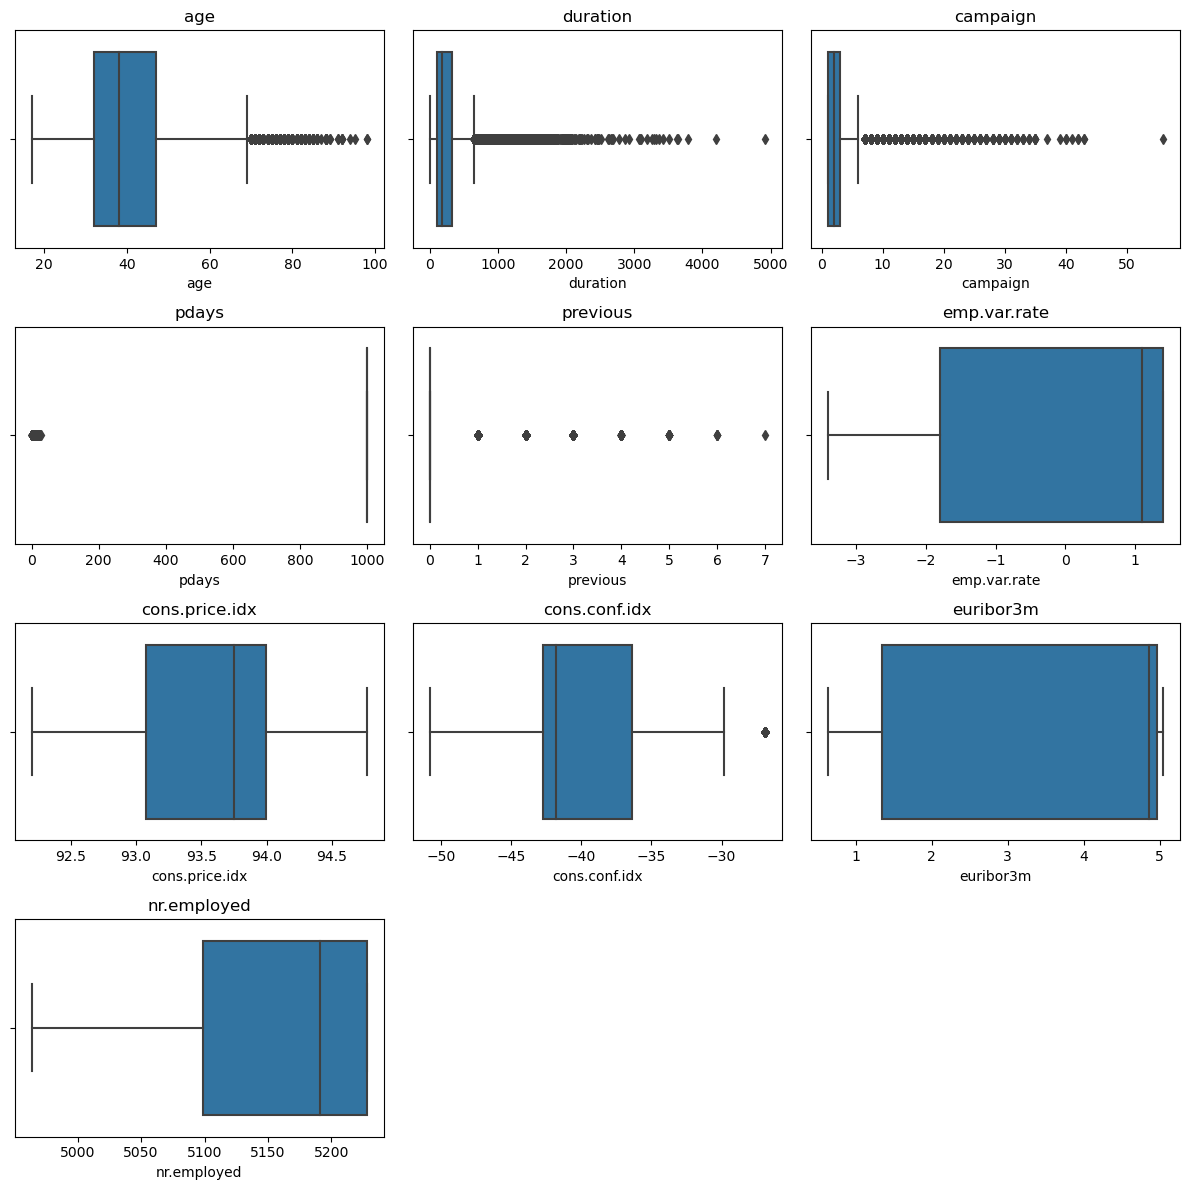

In [6]:
# Outliers
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))
numeric_cols = [
    'age', 'duration', 'campaign', 'pdays', 'previous',
    'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
    'euribor3m', 'nr.employed'
]

for i, col in enumerate(numeric_cols):
    plt.subplot(4, 3, i+1)
    sns.boxplot(x=col, data=df)
    plt.title(col)

plt.tight_layout()
plt.show()


In the absence of ML, what is the success rate?

In [7]:
df['target'] = np.where(df['y'].isin(['yes']),1,0)
df['target'].mean().round(2)
#Event rate is 11%. 
# We do not have to balace this case as we have sufficient Event rate to diff between success VS failure. 
# if not balanced  use "SMOTE" (1%<) to perform Over_sampling or Under_sampling

0.11

Without any ML intervention, the telemarketing team currently achieves an 11% success rate. This project aims to evaluate how much improvement an ML model can bring in optimizing customer targeting and increasing conversion rates.

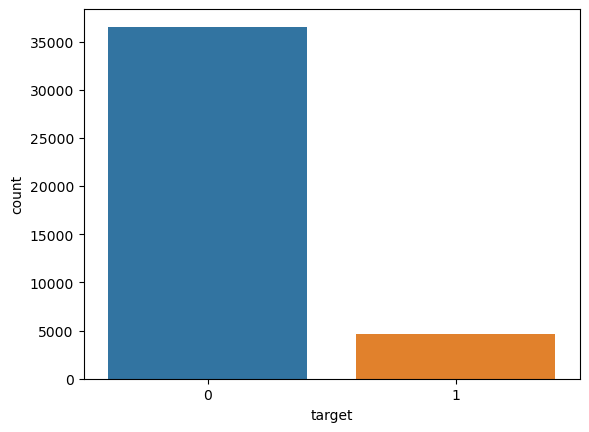

In [8]:
import seaborn as sns
sns.countplot(x='target', data=df)
plt.show()

In [9]:
# #Correlation Heatmap
# plt.figure(figsize=(10,6))
# sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
# plt.title("Feature Correlation Heatmap")
# plt.show()

In [10]:
# # distribution of job types, marital status, and education
# for col in ['job', 'marital', 'education']:
#     plt.figure(figsize=(8,4))
#     sns.countplot(y=df[col], order=df[col].value_counts().index)
#     plt.title(f"Distribution of {col}")
#     plt.show()

In [11]:
# #Relationship between categorical features and target variable
# for col in ['job', 'marital', 'education']:
#     plt.figure(figsize=(8,4))
#     sns.barplot(x=df[col], y=df['y'].apply(lambda x: 1 if x=='yes' else 0))
#     plt.xticks(rotation=45)
#     plt.title(f"Proportion of 'yes' in {col}")
#     plt.show()


In [12]:
# # Continuous numeric columns from the dataset
# num_cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 
#             'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# # Plot histograms & boxplots for numeric columns
# for col in num_cols:
#     fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
#     sns.histplot(df[col], bins=30, kde=True, ax=axes[0])
#     axes[0].set_title(f"Distribution of {col}")

#     sns.boxplot(x=df[col], ax=axes[1])
#     axes[1].set_title(f"Boxplot of {col}")

#     plt.show()


A variable helps explain variations in the dependent variable by defining a trend across the X-axis in a regression model.

If an independent variable creates a visible slope when compared to the dependent variable, it suggests a meaningful relationship and should be considered in the analysis.

In [13]:
df['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

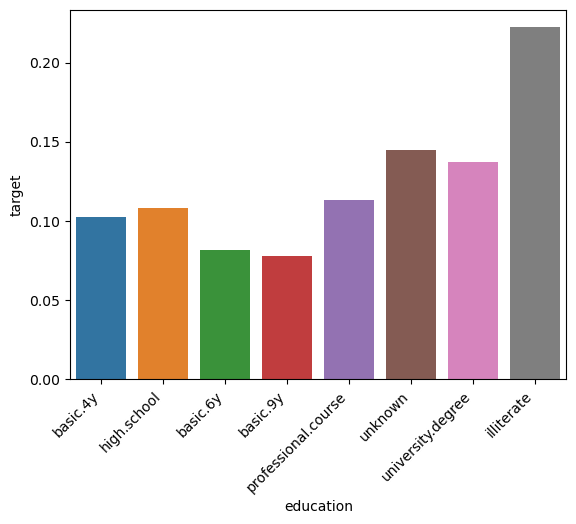

In [15]:
#category wise probability of taking up a term loan
from statistics import mean
ax = sns.barplot(x="education", y="target", data=df, estimator=mean)
plt.xticks(rotation=45, ha='right')
plt.show()
# There are counter intuitive issues in this variable. Because we can clearly see that Unknown and illiterate have a high probability of taking a 
# term loan but we don't want them to take a term loan

In [16]:
# combining all the 3 basic edu category's into one and unknown and illiterate into another category
df['education']=np.where(df['education']=='basic.9y', 'Basic', df['education'])
df['education']=np.where(df['education']=='basic.6y', 'Basic', df['education'])
df['education']=np.where(df['education']=='basic.4y', 'Basic', df['education'])
df['education']=np.where(df['education']=='illiterate', 'unknown', df['education'])

In [17]:
df.groupby('education')['target'].mean()

education
Basic                  0.087029
high.school            0.108355
professional.course    0.113485
university.degree      0.137245
unknown                0.145798
Name: target, dtype: float64

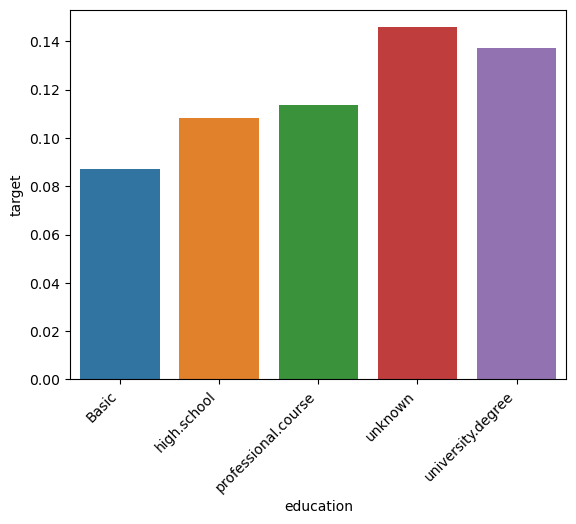

In [18]:
ax = sns.barplot(x="education", y="target", data=df, estimator=mean)
plt.xticks(rotation=45, ha='right')
plt.show()
# Good indicator based on slope (consider this variable)

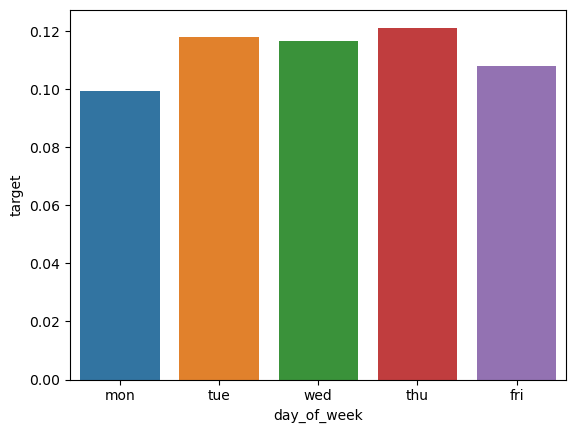

In [19]:
ax=sns.barplot(x="day_of_week", y="target", data=df, estimator=mean)
# since there is no discrimination or solpe we can drop this variable
# (Drop day_of_week)

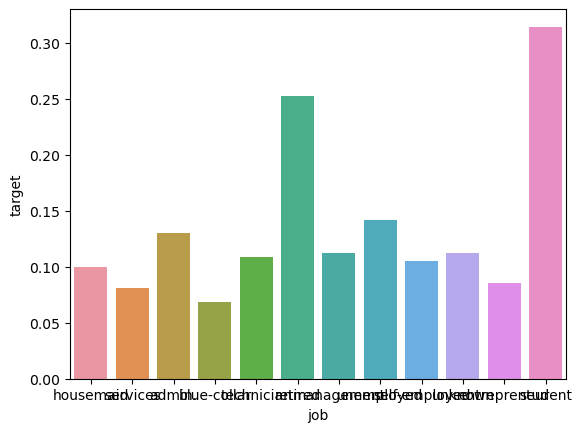

In [20]:
ax=sns.barplot(x="job", y="target", data=df, estimator=mean)

In [21]:
df.groupby('job')['target'].mean()

job
admin.           0.129726
blue-collar      0.068943
entrepreneur     0.085165
housemaid        0.100000
management       0.112175
retired          0.252326
self-employed    0.104856
services         0.081381
student          0.314286
technician       0.108260
unemployed       0.142012
unknown          0.112121
Name: target, dtype: float64

In [22]:
df['job']=np.where(df['job']=='unknown', 'unemployed', df['job'])
df.groupby('job')['target'].mean()

job
admin.           0.129726
blue-collar      0.068943
entrepreneur     0.085165
housemaid        0.100000
management       0.112175
retired          0.252326
self-employed    0.104856
services         0.081381
student          0.314286
technician       0.108260
unemployed       0.134673
Name: target, dtype: float64

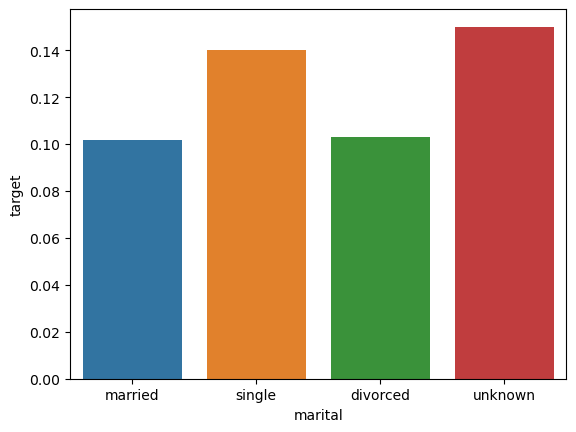

In [23]:
ax=sns.barplot(x="marital", y="target", data=df, estimator=mean)
#not much difference in slope (can not find a trend)
#(Drop marital)

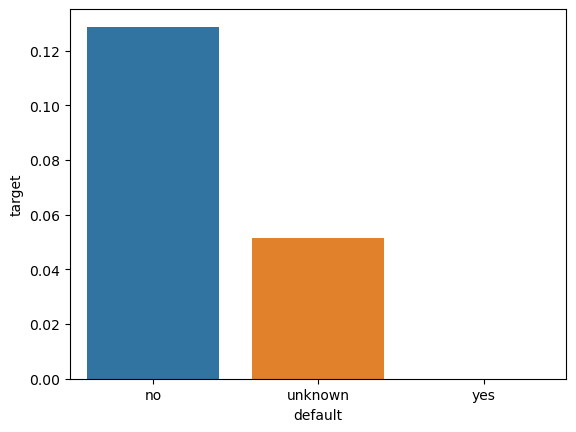

In [24]:
ax=sns.barplot(x="default", y="target", data=df, estimator=mean)
#there clearly is a slop and discrimination but there is no data for ppl who have defaulted, whcih makes it a bad predictor
# (Drop default)

In [25]:
df.groupby('default')['target'].count()

default
no         32588
unknown     8597
yes            3
Name: target, dtype: int64

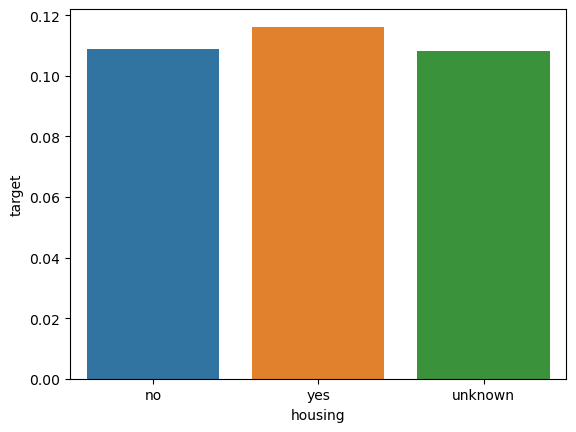

In [26]:
ax=sns.barplot(x="housing", y="target", data=df, estimator=mean)
#No slope, bad predictor (Drop housing)

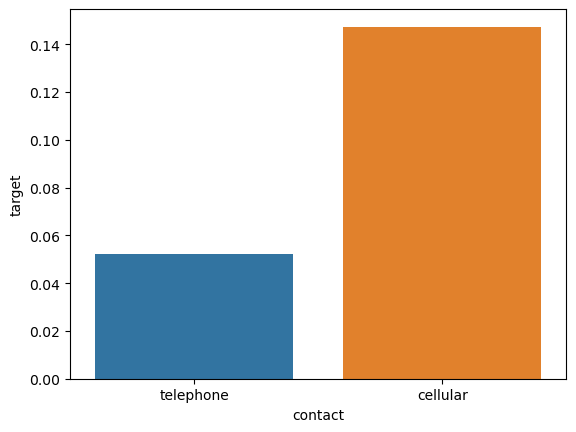

In [27]:
ax=sns.barplot(x="contact", y="target", data=df, estimator=mean)
# Its a good indicator and has a slop
# Consider this variable

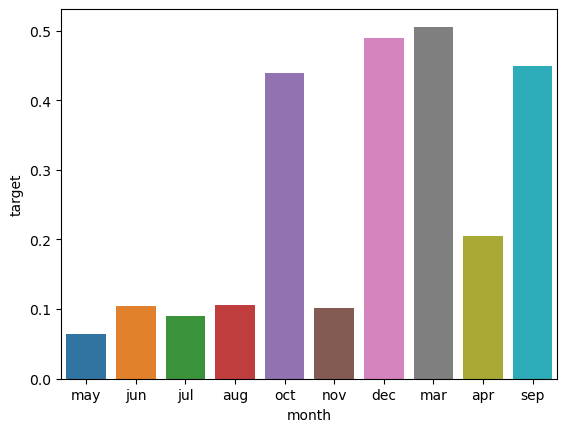

In [28]:
ax=sns.barplot(x="month", y="target", data=df, estimator=mean)

In [29]:
# Transforming months in quatres
df['qtr'] = np.where(df['month'].isin(['jan', 'feb', 'mar']),'Q1',np.where(df['month'].isin(['apr', 'may', 'jun']), 'Q2',np.where(df['month'].isin(['jul', 'aug', 'sep']), 'Q3',np.where(df['month'].isin(['oct', 'nov', 'dec']), 'Q4',0))))
df['qtr'].value_counts()

Q2    21719
Q3    13922
Q4     5001
Q1      546
Name: qtr, dtype: int64

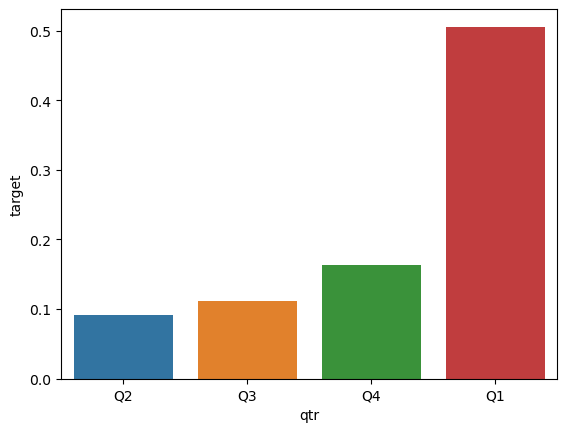

In [30]:
ax=sns.barplot(x="qtr", y="target", data=df, estimator=mean)
# Consider this variable

In [31]:
# What is the chance of customer accepting a term loan in different quatres
df.groupby('qtr')['target'].mean()
# we can see that there is a 50% chance of a customer accepting a term loan in Q1

qtr
Q1    0.505495
Q2    0.091349
Q3    0.112053
Q4    0.163967
Name: target, dtype: float64

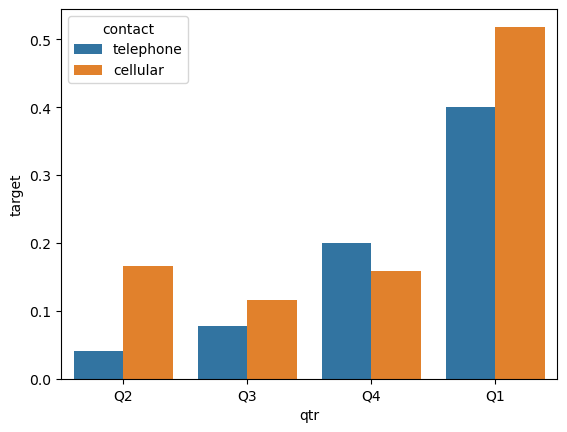

In [32]:
ax=sns.barplot(x="qtr", y="target", hue='contact',data=df, estimator=mean)

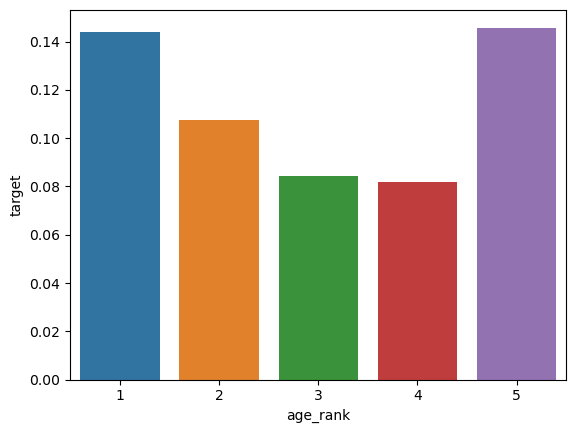

In [33]:
# Here we are converting continues variables into categories and creating ranks to use them as categories
df['age_rank']=pd.qcut(df['age'].rank(method='first').values,5,duplicates='drop').codes+1
ax=sns.barplot(x="age_rank", y="target", data=df, estimator=mean)
# this is giving a U shaped curve which might not be significant (we can consider this or we can also drop this) (drop this)

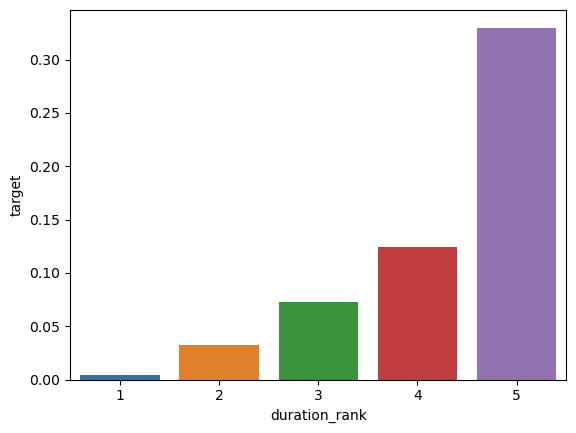

In [34]:
# Again converting continues variables into categorical (using ranks)
df['duration_rank']=pd.qcut(df['duration'].rank(method='first').values,5,duplicates='drop').codes+1
ax=sns.barplot(x="duration_rank", y="target", data=df, estimator=mean)
# as the duration increases beyond a point then the chance of term loan is high
# We can not use it because we dont know the duration of the call until its made (drop this variable)

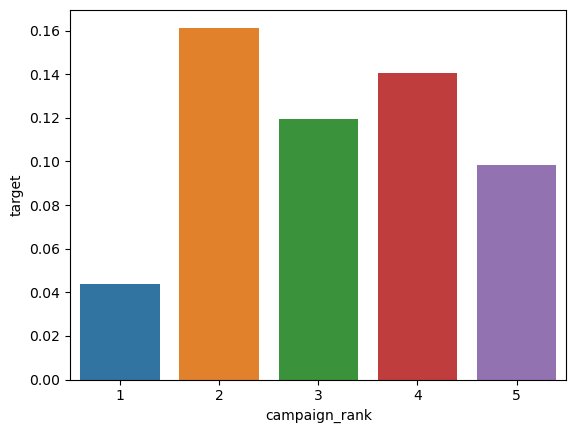

In [35]:
# converting continues variables into categorical (using ranks)
df['campaign_rank']=pd.qcut(df['campaign'].rank(method='first').values,5,duplicates='drop').codes+1
ax=sns.barplot(x="campaign_rank", y="target", data=df, estimator=mean)
# again not a strong slop because of no-linearity (we can consider this or we can also drop this)(lets consider this variable)

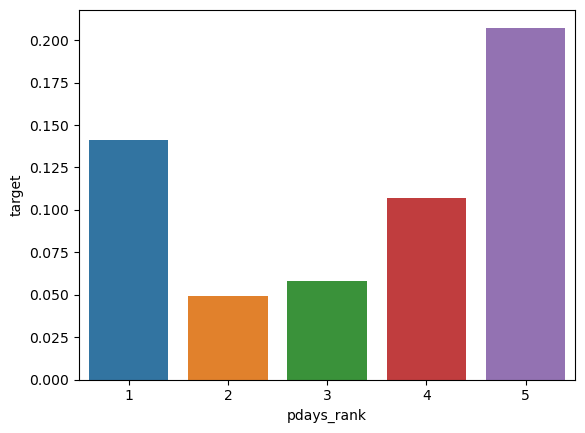

In [36]:
# converting continues variables into categorical (using ranks)
df['pdays_rank']=pd.qcut(df['pdays'].rank(method='first').values,5,duplicates='drop').codes+1
ax=sns.barplot(x="pdays_rank", y="target", data=df, estimator=mean)
# again not a strong slop because of no-linearity, but some trends can be observed (we can consider this or we can also drop this)(lets consider this variable)

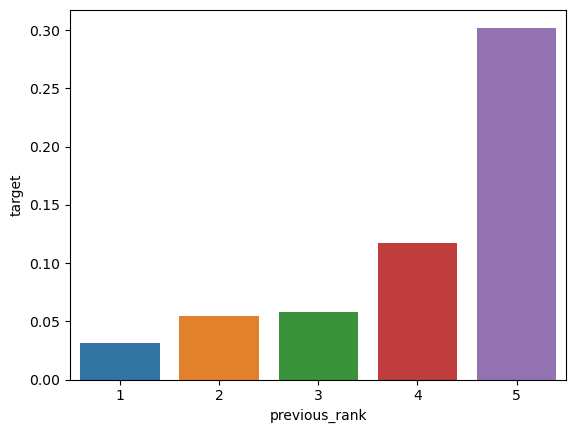

In [37]:
# converting continues variables into categorical (using ranks)
df['previous_rank']=pd.qcut(df['previous'].rank(method='first').values,5,duplicates='drop').codes+1
ax=sns.barplot(x="previous_rank", y="target", data=df, estimator=mean)
# again not a strong slop because of no-linearity (we can consider this variable)

In [38]:
df['poutcome_new']=np.where(df['poutcome'].isin(['failure','nonexistent']),0,1) #0 for failure and nonexistent, 1 for success
df.groupby('poutcome_new')['target'].mean()
# The data is biased, with significantly fewer failure instances compared to the success rate, which could skew the mode if taken into account
# Drop this

poutcome_new
0    0.094085
1    0.651129
Name: target, dtype: float64

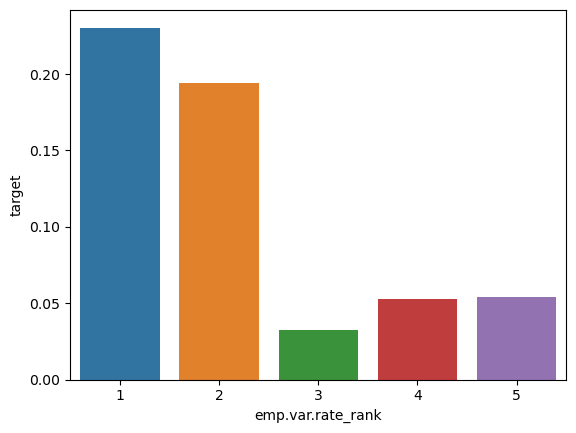

In [39]:
# converting continues variables into categorical (using ranks)
df['emp.var.rate_rank']=pd.qcut(df['emp.var.rate'].rank(method='first').values,5,duplicates='drop').codes+1
ax=sns.barplot(x="emp.var.rate_rank", y="target", data=df, estimator=mean)
# consider this variable

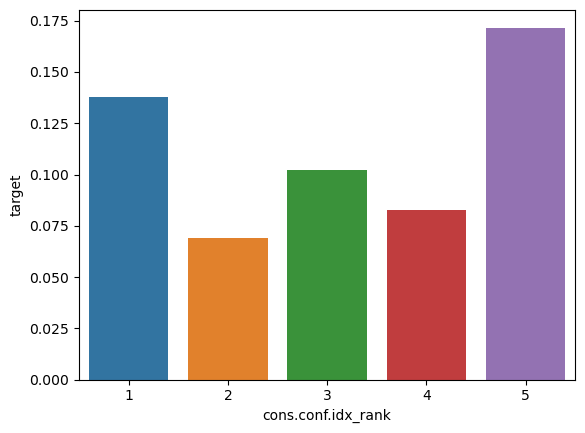

In [40]:
# converting continues variables into categorical (using ranks)
df['cons.conf.idx_rank']=pd.qcut(df['cons.conf.idx'].rank(method='first').values,5,duplicates='drop').codes+1
ax=sns.barplot(x="cons.conf.idx_rank", y="target", data=df, estimator=mean)
# consider this variable

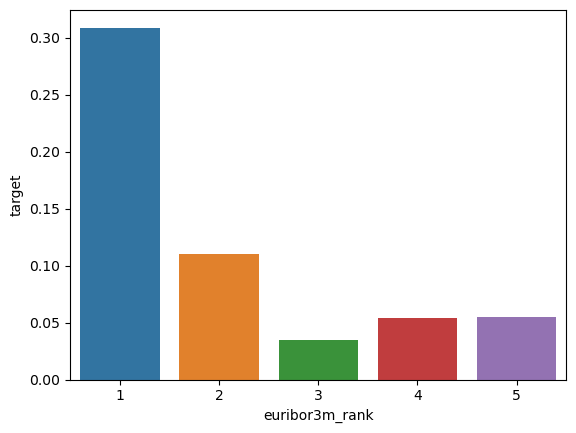

In [41]:
# converting continues variables into categorical (using ranks)
df['euribor3m_rank']=pd.qcut(df['euribor3m'].rank(method='first').values,5,duplicates='drop').codes+1
ax=sns.barplot(x="euribor3m_rank", y="target", data=df, estimator=mean)
# consider this variable

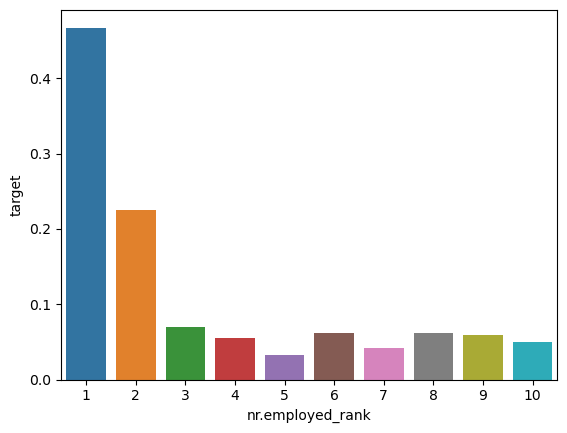

In [44]:
# converting continues variables into categorical (using ranks)
df['nr.employed_rank']=pd.qcut(df['nr.employed'].rank(method='first').values,10,duplicates='drop').codes+1
ax=sns.barplot(x="nr.employed_rank", y="target", data=df, estimator=mean)

In [47]:
df['employ_rank'] = np.where(df['nr.employed_rank'].isin([3, 4, 5, 6, 7, 8, 9, 10]), 'C',
                     np.where(df['nr.employed_rank'].isin([1]), 'A',
                     np.where(df['nr.employed_rank'].isin([2]), 'B', 'X')))

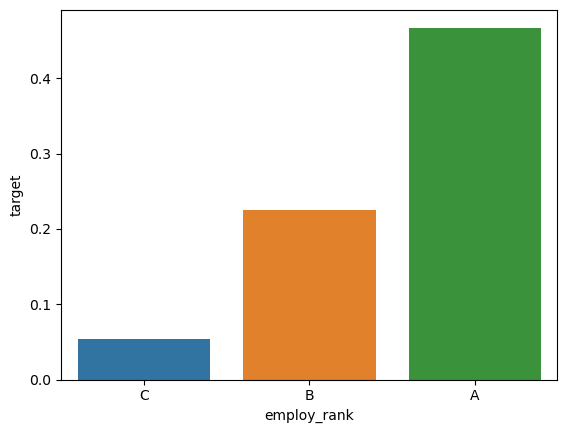

In [48]:
ax=sns.barplot(x='employ_rank', y="target", data=df, estimator=mean)

In [297]:
# Final Variable selection, based on the EDA performed
col_num = ['pdays', 'emp.var.rate', 'euribor3m', 'previous', 'campaign', 'cons.conf.idx', 'emp.var.rate']
col_char=['qtr', 'education', 'job', 'contact', 'employ_rank']


In [298]:
X_char_dum=pd.get_dummies(df[col_char], drop_first = 'True')

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


In [299]:
X_all = pd.concat([df[col_num], X_char_dum], axis=1, join='inner')

In [300]:
X_var = X_all
Y_var=df['target']

In [339]:
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics


x_train, x_test, y_train, y_test = train_test_split (X_var, Y_var, test_size= 0.2, random_state=99)
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

dtree = DecisionTreeClassifier(class_weight='balanced')
dtree.fit(x_train, y_train)

rf_1000 = RandomForestClassifier(n_estimators=1000, random_state=41, criterion='gini', max_features='auto',max_depth=5)
rf_1000.fit(x_train, y_train)

c:\Users\varun\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier(max_depth=5, max_features='auto', n_estimators=1000,
                       random_state=41)

In [340]:
y_pred = logreg.predict(x_test)
print('Accuracy of Logistic regression on the test set:{:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of Logistic regression on the test set:0.90


In [341]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[7235   68]
 [ 774  161]]


In [342]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.95      7303
           1       0.70      0.17      0.28       935

    accuracy                           0.90      8238
   macro avg       0.80      0.58      0.61      8238
weighted avg       0.88      0.90      0.87      8238



In [343]:
y_pred = dtree.predict(x_test)
print('Accuracy of Decision Tree on the test set:{:.2f}'.format(dtree.score(x_test, y_test)))

Accuracy of Decision Tree on the test set:0.79


In [344]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[6171 1132]
 [ 566  369]]


In [345]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.84      0.88      7303
           1       0.25      0.39      0.30       935

    accuracy                           0.79      8238
   macro avg       0.58      0.62      0.59      8238
weighted avg       0.84      0.79      0.81      8238



In [346]:
y_pred = rf_1000.predict(x_test)
print('Accuracy of Decision Tree on the test set:{:.2f}'.format(rf_1000.score(x_test, y_test)))

Accuracy of Decision Tree on the test set:0.90


In [347]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[7235   68]
 [ 772  163]]


In [348]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.95      7303
           1       0.71      0.17      0.28       935

    accuracy                           0.90      8238
   macro avg       0.80      0.58      0.61      8238
weighted avg       0.88      0.90      0.87      8238



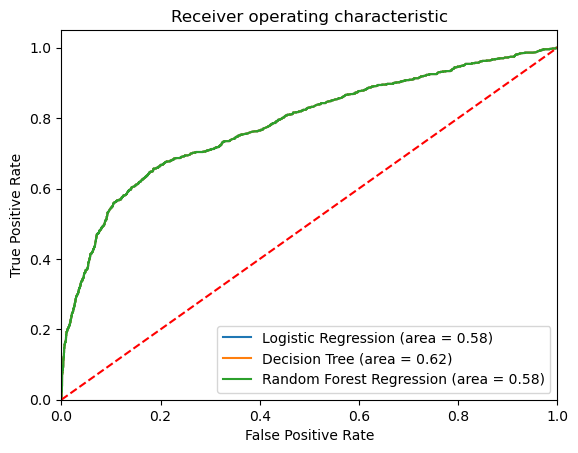

In [349]:
from sklearn.metrics import roc_curve, roc_auc_score
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
tree_roc_auc = roc_auc_score(y_test, dtree.predict(x_test))
RF_roc_auc = roc_auc_score(y_test, rf_1000.predict(x_test))

fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, dtree.predict_proba(x_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, rf_1000.predict_proba(x_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % tree_roc_auc)
plt.plot(fpr, tpr, label='Random Forest Regression (area = %0.2f)' % RF_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')
plt.savefig('Log_ROC')
plt.show()


##### After the two steps below are completed and the data is exported to a CSV file, the Gain Chart, Lift Chart, and Precision-Recall (PR) Curve cannot be created within the notebook. These visualizations are best built in Tableau using the exported data. It is up to the Tableau user to decide whether to proceed with creating these charts or leave them out based on the requirements of the analysis.

In [350]:
# # Step 1: Get predicted probabilities for the positive class
# y_pred_prob = logreg.predict_proba(X_var)[:, 1]

# # Step 2: Create a DataFrame with the predictions
# df['y_pred_logit'] = pd.DataFrame(y_pred_prob)

# # Step 3: Bin predictions into 10 quantile-based ranks
# df['P_Rank_logit'] = pd.qcut(df['y_pred'].rank(method='first').values, 10, duplicates='drop').codes + 1

# # Step 4: Group by those ranks and sum the actual target values
# df.groupby('P_Rank_logit')['target'].sum()

In [351]:
# Step 1: Predict probabilities for the positive class
y_pred_prob = logreg.predict_proba(X_var)[:, 1]

# Step 2: Add the predicted probabilities to the DataFrame
df['y_pred_p'] = pd.DataFrame(y_pred_prob)

# Step 3: Create decile ranks (1 to 10) based on predicted probabilities
df['P_Rank_logit'] = pd.qcut(df['y_pred_p'].rank(method='first').values, 10, duplicates='drop').codes + 1

# Step 4: Get mean of the actual target variable in each decile
df.groupby('P_Rank_logit')['target'].mean()


P_Rank_logit
1     0.037145
2     0.032289
3     0.035931
4     0.057552
5     0.062637
6     0.059966
7     0.054881
8     0.086914
9     0.233066
10    0.466133
Name: target, dtype: float64

In [352]:
# # Step 1: Get predicted probabilities for class 1 using the decision tree model
# y_pred_prob_dtree = dtree.predict_proba(X_var)[:, 1]

# # Step 2: Store predicted probabilities in the DataFrame
# df['y_pred_P_dtree'] = pd.DataFrame(y_pred_prob_dtree)

# # Step 3: Create decile-based ranking (1 to 10) of predictions
# df['P_Rank_dtree'] = pd.qcut(df['y_pred_P_dtree'].rank(method='first').values, 10, duplicates='drop').codes + 1

# # Step 4: Group by deciles and sum the actual target values
# df.groupby('P_Rank_dtree')['target'].sum()

In [353]:
# Step 1: Get predicted probabilities for class 1 from the decision tree
y_pred_prob_dtree = dtree.predict_proba(X_var)[:, 1]

# Step 2: Add those probabilities to the DataFrame
df['y_pred_P_dtree'] = pd.DataFrame(y_pred_prob_dtree)

# Step 3: Create decile (10-bin) rank based on predicted probabilities
df['P_Rank_dtree'] = pd.qcut(df['y_pred_P_dtree'].rank(method='first').values, 10, duplicates='drop').codes + 1

# Step 4: Get average target value (probability of 1) in each decile
df.groupby('P_Rank_dtree')['target'].mean()


P_Rank_dtree
1     0.006798
2     0.007526
3     0.013353
4     0.012627
5     0.018208
6     0.055839
7     0.033511
8     0.073076
9     0.172129
10    0.733430
Name: target, dtype: float64

In [354]:
#df = df.drop(columns=['y_pred', 'P_Rank_logit', 'y_pred_P_dtree', 'P_Rank_dtree'])  # keep only the ones you want

In [355]:
#df.to_csv('telemarketing_model_scored_file.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,poutcome_new,emp.var.rate_rank,cons.conf.idx_rank,euribor3m_rank,nr.employed_rank,employ_rank,y_pred_p,P_Rank_logit,y_pred_P_dtree,P_Rank_dtree
0,56,housemaid,married,Basic,no,no,no,telephone,may,mon,...,0,3,4,3,4,C,0.029702,3,0.000000,1
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,3,4,3,4,C,0.027411,2,0.086842,7
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,3,4,3,4,C,0.027411,2,0.086842,7
3,40,admin.,married,Basic,no,no,no,telephone,may,mon,...,0,3,4,3,4,C,0.029384,3,0.000000,1
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,3,4,3,4,C,0.027411,2,0.086842,7


In [356]:
df.to_csv('bank_marketing_model_fit.csv')